## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 통계
- 평가일 : 22.9.08
- 성명 :
- 점수 :

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [17]:
# A.
data = df.mathematics.describe()
iqr = data['75%'] - data['25%']
r = data['max'] - data['min']
v = data['std']**2
f = df.mathematics.mode()
print(data,'\n','범위:',r,'\n','최빈값:',f.values,'\n', '분산:', v,'\n','IQR:', iqr)

count    50.000000
mean     78.880000
std       8.414371
min      57.000000
25%      76.000000
50%      80.000000
75%      84.000000
max      94.000000
Name: mathematics, dtype: float64 
 범위: 37.0 
 최빈값: [77 82 84] 
 분산: 70.80163265306119 
 IQR: 8.0


Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [19]:
score = df.english
type(score)

pandas.core.series.Series

In [24]:
# A.
z = (score - np.mean(score)) / np.std(score)
z.values[:5]

array([-1.68843012,  1.09469645, -0.24532745, -1.79150888, -0.14224869])

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

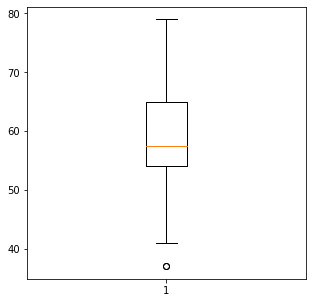

In [26]:
# A : 이상치 탐지를 위한 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.boxplot(score)
plt.show()

In [54]:
# A.이상치 및 인덱스 출력
s = score.describe()
print(s,'\n')
iqr = s['75%'] - s['25%']
print('IQR:',iqr,'\n')
lwhisker_chk = s['25%'] - 1.5 * iqr
print('lwhisker_chk:', lwhisker_chk,'\n')
lwhisker = score[score > lwhisker_chk].min()
print('lwhisker:',lwhisker,'\n')
print('이상치:',score[score < lwhisker].values[0],'\n')
# 이상치 인덱스 확인
idx = score[score < lwhisker].index
print('이상치 인덱스:', idx)

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64 

IQR: 11.0 

lwhisker_chk: 37.5 

lwhisker: 41 

이상치: 37 

이상치 인덱스: Int64Index([20, 35], dtype='int64', name='student number')


In [50]:
# A. 이상치 제거
rscore = score.drop(idx)

rscore.describe()

count    48.000000
mean     59.270833
std       8.936513
min      41.000000
25%      54.000000
50%      59.500000
75%      65.250000
max      79.000000
Name: english, dtype: float64

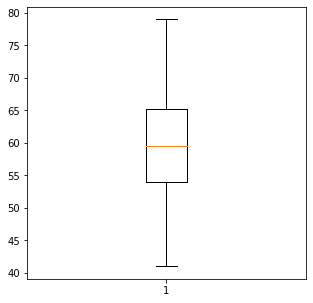

In [51]:
# A. 이상치 제거 확인
plt.figure(figsize=(5,5))
plt.boxplot(rscore)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [64]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [59]:
# A.
en_scores = scores_df.english
ma_scores = scores_df.mathematics
np.cov(en_scores,ma_scores)[0,1].round(2)

69.78

In [61]:
# A.
np.corrcoef(en_scores, ma_scores)[0,1].round(2)

0.82

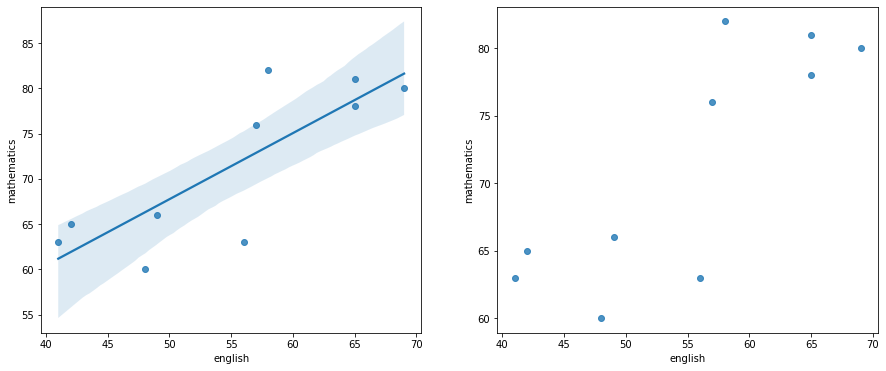

In [62]:
# A.
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,6),sharex=True)
sns.regplot(ax=axes[0], x=scores_df.english,y=scores_df.mathematics)
sns.regplot(ax=axes[1], x=scores_df.english,y=scores_df.mathematics,fit_reg=False )
plt.show()

<AxesSubplot:>

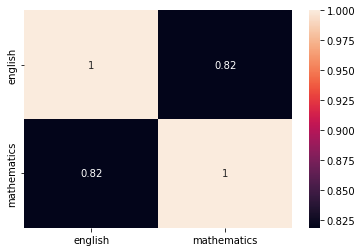

In [63]:
# A.
sns.heatmap(scores_df[['english','mathematics']].corr(),annot=True)

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [69]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

Text(0, 0.5, 'relative frequency')

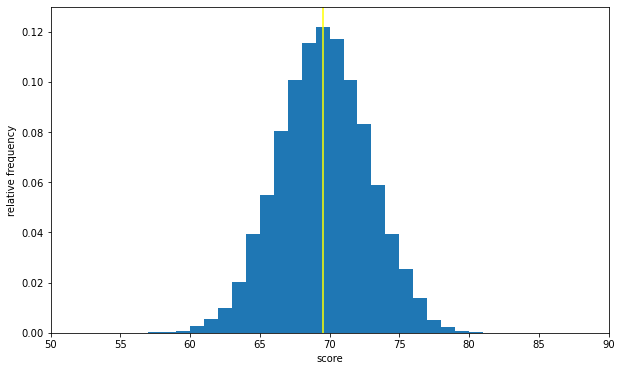

In [70]:
# A.
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

plt.figure(figsize=(10, 6))

plt.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
plt.vlines(np.mean(scores), 0, 1, 'yellow')
plt.axis([50, 90, 0, 0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [82]:
# A
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f
X = Bern(0.5)
print(f'기댓값: {E(X):.2}')
print(f'분산: {(V(X)):.2}')

기댓값: 0.5
분산: 0.25


Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [83]:
# A.
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f
X=Bin(10,0.5)
print(f'기댓값: {E(X):.2}')
print(f'분산: {(V(X)):.2}')

기댓값: 5.0
분산: 2.5


Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [80]:
# A.
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f
X = Poi(2)
print(f'기댓값: {E(X):.2}')
print(f'분산: {(V(X)):.2}')

기댓값: 2.0
분산: 2.0


Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

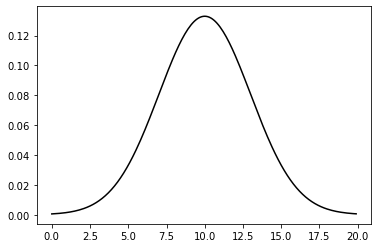

In [85]:
# A.
import matplotlib.pyplot as plt
from scipy import stats, integrate
x_plot = np.arange(0,20,0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot,loc=10,scale=3), color='black')

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

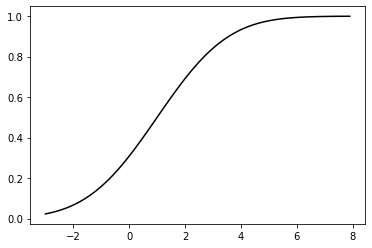

In [86]:
# A.
import matplotlib.pyplot as plt
x_plot = np.arange(-3,8,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot,loc=1,scale=2), color='black')

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [91]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("./dataset/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [92]:
# A. df2의 species의 A, B를 C,D로 변경
df1 = pd.read_csv("./dataset/5_2_fm.csv")
df2 = df1.copy()
df2.species = list('CCCDDD')
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [93]:
# A. df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
import pandas as pd
import numpy as np

def change(a, b):
    if a == 'C':
        return b*2
    else:
        return b*3    

df2['len'] = df2.apply(lambda x:change(x['species'],x['length']),axis=1)
df2.length = df2.len
df2.drop('len',axis=1,inplace=True)
df2
df = pd.concat([df1,df2])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
6,C,4
7,C,6
8,C,8
9,D,18


In [94]:
# A. df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출
df.groupby('species').describe()

length                                         
         count  mean  std   min   25%   50%   75%   max
species                                                
A          3.0   3.0  1.0   2.0   2.5   3.0   3.5   4.0
B          3.0   8.0  2.0   6.0   7.0   8.0   9.0  10.0
C          3.0   6.0  2.0   4.0   5.0   6.0   7.0   8.0
D          3.0  24.0  6.0  18.0  21.0  24.0  27.0  30.0

Q12. "5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [6]:
import pandas as pd
shoes = pd.read_csv("./dataset/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [7]:
# A. 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요.
df = pd.concat([shoes,shoes1],ignore_index=True)
df    

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
4,tokyo,blue,10
5,tokyo,red,15
6,osaka,blue,13
7,osaka,red,9


In [98]:
# A. 피봇을 이용해서 교차분석표를 만드세요
cross = pd.pivot_table(data = df, values='sales',aggfunc='sum', index= 'store', columns = 'color')
cross

color,blue,red
store,,
osaka,26,18
tokyo,20,30


In [99]:
# A. 독립성 검정
# p값이 0.05보다 크므로 "매장에 따라 신발색이 다르다"는 가설은 유의미하지 않다
import scipy as sp
from scipy import stats
sp.stats.chi2_contingency(cross, correction=False)

(3.413537549407115,
 0.06466368573255789,
 1,
 array([[21.53191489, 22.46808511],
        [24.46808511, 25.53191489]]))

Q13. 'titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [100]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='None-pclass', ylabel='sex'>

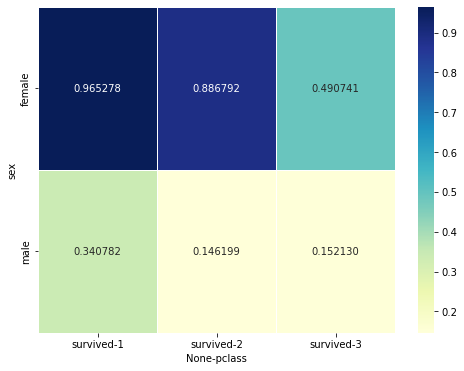

In [101]:
# A.
import seaborn as sns
table = titanic.pivot_table(index=['sex'],columns=['pclass'],values=['survived'],\
                        aggfunc='mean')
table
plt.figure(figsize=(8,6))
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [104]:
# A.
# 평균 4, 표준편차 0.8인 정규분포에서 10개 샘플 추출
from scipy import stats
population = stats.norm(loc=4,scale=0.8)
population.rvs(size=10)

sample_mean_array = np.zeros(10000)

for i in range(10000):
    sample_mean_array[i] = population.rvs(size = 10).mean().round(2)
sample_mean_array[:10]

array([3.72, 3.79, 4.27, 4.17, 3.95, 3.7 , 4.03, 4.16, 3.8 , 4.36])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

<AxesSubplot:ylabel='Count'>

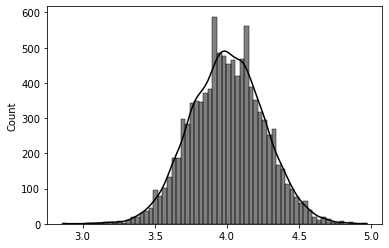

In [105]:
# A.
import seaborn as sns
sns.histplot(sample_mean_array,color='black',kde=True)

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

[ 1.74386154  0.64274096  0.71338259 ... -0.05701906  4.42107116
  0.72197657] 

[ 1.41415709 -0.69531567  4.68571252 ...  1.44593173  5.4637401
  2.97456416] 

평균: 1.0012901439177246 2.001266977431817 

분산: 2.0007119413082988 2.9968018027436996 

합의 평균, 분산: 3.002557121349541 4.98868934401812


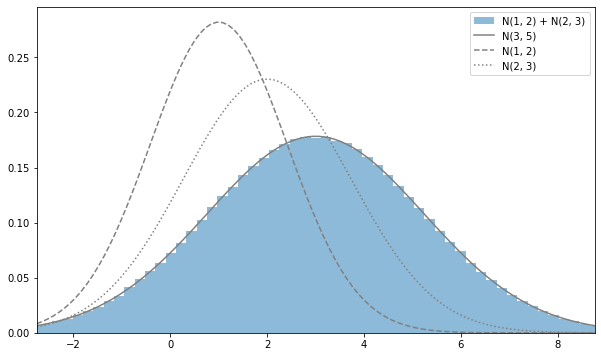

In [106]:
# A.
# 서로 독립인 X~N(1,2), Y~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따름
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
print(X_sample,'\n')
print(Y_sample,'\n')
sum_sample = X_sample + Y_sample
print('평균:', np.mean(X_sample),np.mean(Y_sample),'\n')
print('분산:', np.var(X_sample),np.var(Y_sample),'\n')
print('합의 평균, 분산:', np.mean(sum_sample), np.var(sum_sample))

plt.figure(figsize=(10, 6))

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)
# print(xs)

plt.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
plt.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
plt.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
plt.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

plt.legend()
plt.xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

평균: 3.001325 4.00026 

분산: 3.002705244375001 3.999695932399997 

합의 평균, 분산: 7.001585 6.991778487775001


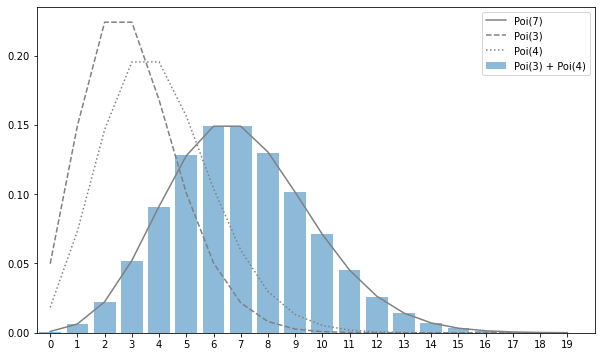

In [108]:
# A.
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

print('평균:', np.mean(X_sample),np.mean(Y_sample),'\n')
print('분산:', np.var(X_sample),np.var(Y_sample),'\n')
print('합의 평균, 분산:', np.mean(sum_sample), np.var(sum_sample))

plt.figure(figsize=(10, 6))

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

plt.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
plt.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
plt.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
plt.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

plt.legend()
plt.xlim(-0.5, 20)
plt.xticks(np.arange(20))
plt.show()

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

표본 추출: (10, 1000000) 
 첫번째 열: [0 0 1 0 0 1 0 1 0 1] 

성공 횟수: [4 5 4 ... 5 5 1] 

성공 횟수의 평균, 분산: 3.001153 2.1007376705910006


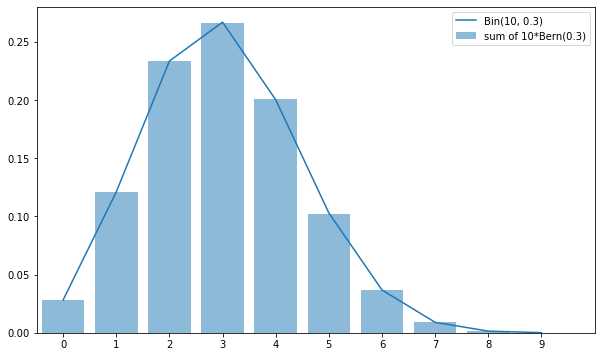

In [110]:
# A.
import sys
np.set_printoptions(threshold=1000)
np.random.seed(0)
p = 0.3
rv = stats.bernoulli(p)
sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
print('표본 추출:', Xs_sample.shape,'\n', '첫번째 열:', Xs_sample[:,0],'\n')
sum_sample = np.sum(Xs_sample, axis=0)
print('성공 횟수:', sum_sample,'\n')
print('성공 횟수의 평균, 분산:', np.mean(sum_sample), np.var(sum_sample))

# 베르누이 합의 분포는 이항분포와 같다.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

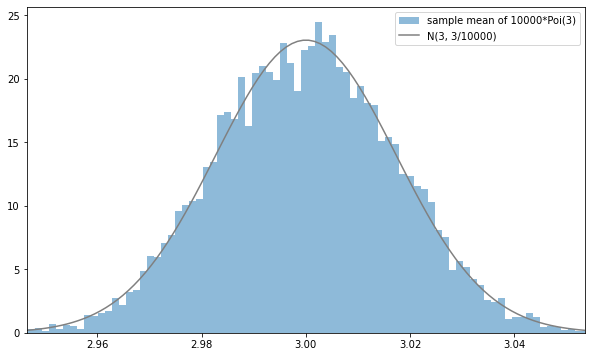

In [112]:
# A.
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

plt.figure(figsize=(10, 6))

plt.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
plt.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

plt.legend()
plt.xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

중심극한정리 : 확률변수 $X_1,X_2,...Xn$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포 F를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다. 

Q20. 아래 df 데이터셋에서 "무게의 평균이 130g이다."라는 귀무가설에 대한 유의성 검정을 수행하세요.(정규분포, 모분산 9) 

In [1]:
df = pd.read_csv('./data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [5]:
# A.
# 검정통계량 z : 표본평균을 표준화
from scipy import stats

sample = df.무게
s_mean = np.mean(sample)
z = (s_mean - 130) / np.sqrt(9/14)

# 임곗값
# 검정통계량이 임곗값 보다 작으므로 귀무가설은 기각되고 평균은 130g 보다 작다는 결론에 이른다.
rv = stats.norm()
rv.isf(0.95)

# 검정통계량으로 부터 p값 산출
# p값이 유의수준 0.05 보다 작으므로 귀무가설 기각
rv.cdf(z)

0.026661319523126635